In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
sklearn.__version__

'0.21.3'

In [3]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

Genrating the data for KNN
- Generate value for class 0
    - Generate 50,x1 values within the range 0 to 50
    - Generate 50,x2 values within the range 1 to 50
    - Creat a  2d array with x1 value as 0th element and x2 values as 1st element, 3rd value is zero.
    
    - o/p ---> [[2,5,0],[3,10,0],[24,12,0]]
    
- Generate value for class 1 
    - Generate x1 values within the range 50 to 100
    - Generate x2 values within the range 1 to 50
    - Creat a  2d array with x1 value as 0th element and x2 values as 1st element, 3rd value is one.
- Create 2nd array which consists both classes data
- Create a DataFrame from this data with added y column

In [4]:
np.random.seed(10)
x1 = np.random.randint(0,50,50)
x1

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11])

In [5]:
x2 = np.random.randint(1,50,50)
x2

array([29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21,
       33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22,
       43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [6]:
np.hstack((x1,x2))

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 29,
       11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21, 33,
       25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22, 43,
       23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [7]:
np.vstack((x1,x2))

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34,
        21, 33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,
         7, 22, 43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34,
        46, 41]])

In [8]:
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y1_2d = np.expand_dims(np.zeros(50, dtype = int),1)

In [9]:
d0 = np.hstack((x1_2d,x2_2d,y1_2d))
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [10]:
np.random.seed(15)
x1 = np.random.randint(50,100,50)
x2 = np.random.randint(1,50,50)
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y1_2d = np.expand_dims(np.ones(50, dtype = int),1)
d1 = np.hstack((x1_2d,x2_2d,y1_2d))
d1

array([[58,  3,  1],
       [62, 43,  1],
       [55, 33,  1],
       [50, 38,  1],
       [78,  8,  1],
       [77, 25,  1],
       [57, 38,  1],
       [61, 46,  1],
       [71, 20,  1],
       [97, 49,  1],
       [79, 41,  1],
       [67, 30,  1],
       [95, 13,  1],
       [81, 25,  1],
       [73, 47,  1],
       [82, 13,  1],
       [60, 34,  1],
       [65,  3,  1],
       [54, 25,  1],
       [91, 45,  1],
       [89, 43,  1],
       [87, 18,  1],
       [69, 24,  1],
       [94, 30,  1],
       [63, 35,  1],
       [79, 24,  1],
       [65, 19,  1],
       [88, 27,  1],
       [65, 27,  1],
       [99, 17,  1],
       [51, 14,  1],
       [81, 27,  1],
       [82, 33,  1],
       [71,  7,  1],
       [76,  5,  1],
       [84, 29,  1],
       [61, 21,  1],
       [51, 36,  1],
       [90, 40,  1],
       [56, 29,  1],
       [91,  6,  1],
       [84,  1,  1],
       [90, 10,  1],
       [72, 49,  1],
       [90, 21,  1],
       [65, 47,  1],
       [78, 39,  1],
       [85, 3

In [11]:
data = np.vstack((d0,d1))

In [12]:
df = pd.DataFrame(data, columns = ["x1","x2","y"])
df.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


In [102]:
df.to_csv("data_knn")

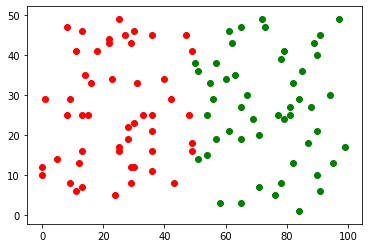

In [13]:
plt.scatter(df["x1"][:50],df["x2"][:50],color = "r")
plt.scatter(df["x1"][50:],df["x2"][50:],color = "g")

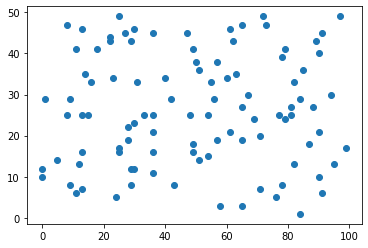

In [14]:
plt.scatter(df["x1"],df["x2"])

In [15]:
df["x2"][:50]

0     29
1     11
2     25
3     10
4     16
5     19
6     17
7      8
8     25
9     12
10    18
11    47
12     8
13    12
14    29
15    34
16    21
17    33
18    25
19    45
20     6
21     5
22     8
23    25
24    25
25    45
26    35
27    41
28    16
29    14
30    25
31    16
32     7
33    22
34    43
35    23
36    12
37    49
38    13
39    29
40    33
41    16
42    45
43    41
44    43
45    46
46    44
47    34
48    46
49    41
Name: x2, dtype: int32

# Separate the features and outcomes

In [16]:
outcome = df["y"]
features = df[["x1","x2"]]
# features = df.drop("y",axis = 1)
outcome[0],features.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [17]:
outcome = df["y"]
features = df[["x1","x2"]]
features = df.drop("y",axis = 1)
outcome[0],features.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [18]:
features.dtypes

x1    int32
x2    int32
dtype: object

In [20]:
outcome.dtype

dtype('int32')

In [24]:
import math
def Eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

In [25]:
Eucledian_distance((3,4),(0,0))

5.0

In [32]:
def Knearest_point(p,d):
    distances = []
    for row in d:
        distances.append(Eucledian_distance(row,p))
    return distances

In [33]:
for row in features.values:
    print(row)
    break

[ 9 29]


In [34]:
Knearest_point((5,34),features.values)

[6.4031242374328485,
 38.600518131237564,
 13.45362404707371,
 24.515301344262525,
 47.53945729601885,
 27.459060435491963,
 26.248809496813376,
 35.38361202590826,
 43.93176527297759,
 32.55764119219941,
 46.8187996428785,
 13.341664064126334,
 26.30589287593181,
 22.561028345356956,
 37.33630940518894,
 35.0,
 33.61547262794322,
 11.045361017187261,
 32.28002478313795,
 43.41658669218482,
 28.635642126552707,
 34.66987164671943,
 46.04345773288535,
 29.410882339705484,
 9.486832980505138,
 32.89376840679705,
 9.055385138137417,
 44.553338819890925,
 19.697715603592208,
 20.0,
 12.041594578792296,
 26.90724809414742,
 28.160255680657446,
 25.942243542145693,
 19.235384061671343,
 27.313000567495326,
 33.301651610693426,
 25.0,
 22.135943621178654,
 6.4031242374328485,
 26.019223662515376,
 35.84689665786984,
 24.596747752497688,
 14.7648230602334,
 25.632011235952593,
 14.422205101855956,
 19.72308292331602,
 18.0,
 27.730849247724095,
 9.219544457292887,
 61.40032573203501,
 57.70615

In [38]:
def Knearest_point(p,d,k):
    '''p = new data point
    d = all the features as numpy array
    k = no of neighbors returns the k nearest neighbors'''
    # creat an empty list to store distances
    distances = []
    for row in d:
        distances.append(Eucledian_distance(row,p))
    # creat the list to numpy array
    distances = np.array(distances)
    # sort the numpy array get the indices based on sorted 
    # values 
    # use the indices to get the k nearest neighbors
    return d[distances.argsort()[:k]]

In [39]:
Knearest_point((5,34),features.values,5)

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41],
       [ 8, 25]])

In [58]:
near_4 = Knearest_point((5,34),features.values,4)

In [59]:
near_4[:,0]

array([ 9,  1, 14, 11])

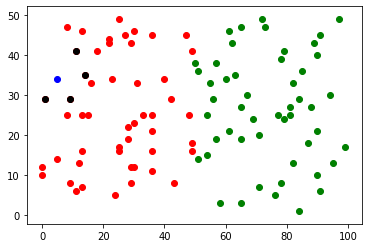

In [60]:
plt.scatter(df["x1"][:50],df["x2"][:50],color = "r")
plt.scatter(df["x1"][50:],df["x2"][50:],color = "g")
plt.plot(5,34,"bo")
plt.scatter(near_4[:,0],near_4[:,1],color = "black")

In [66]:
near_5 = Knearest_point((40,34),features.values,5)
near_5

array([[40, 34],
       [42, 29],
       [31, 33],
       [36, 25],
       [50, 38]])

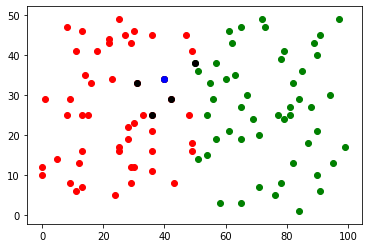

In [67]:
plt.scatter(df["x1"][:50],df["x2"][:50],color = "r")
plt.scatter(df["x1"][50:],df["x2"][50:],color = "g")
plt.plot(40,34,"bo")
plt.scatter(near_5[:,0],near_5[:,1],color = "black")

In [76]:
ind

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41]])

In [78]:
def Knearest_point(p,d,k):
    '''p = new data point
    d = all the features as numpy array
    k = no of neighbors returns the k nearest neighbors'''
    # creat an empty list to store distances
    distances = []
    for row in d:
        distances.append(Eucledian_distance(row,p))
    # creat the list to numpy array
    distances = np.array(distances)
    # sort the numpy array get the indices based on sorted 
    # values 
    # use the indices to get the k nearest neighbors
    return distances.argsort()[:k]

In [89]:
ind = Knearest_point((5,34),features.values,4)

In [90]:
features.values[ind]

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41]])

In [91]:
outcome[ind]

0     0
39    0
26    0
49    0
Name: y, dtype: int32

In [92]:
outcome[ind].value_counts()

0    4
Name: y, dtype: int64

In [93]:
outcome[ind].value_counts().index[0]

0

In [101]:
def output(p,k,features,outcome):
    ind = Knearest_point(p,features.values,k)
    return outcome[ind].value_counts().index[0]
output((5,34),4,features,outcome)

0

In [103]:
for i,feature in features.iterrows():
    print(feature)
    break

x1     9
x2    29
Name: 0, dtype: int32
